- **If you use Jupyter Lab, you have to install the renderer extensions for plotly.**  
    1. https://github.com/jupyterlab/jupyter-renderers
    2. https://github.com/jupyterlab/jupyter-renderers/tree/master/packages/plotly-extension

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
print(plotly.__version__)

# if not "output" in os.listdir():
#     os.mkdir("output")

3.4.1


In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
flights = sns.load_dataset("flights")
flights.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flights_year = flights.groupby("year").passengers.sum().reset_index()
flights_year.head(3)

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


In [5]:
flights_month = flights.groupby("month").passengers.sum().reset_index()
flights_month.head(3)

,month,passengers
0,January,2901
1,February,2820
2,March,3242
3,April,3205
4,May,3262


## Histogram

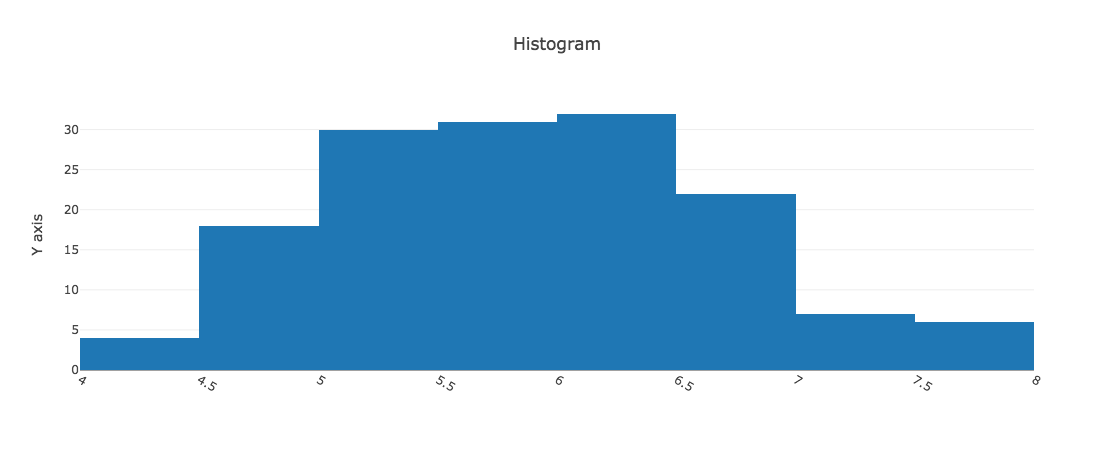

In [6]:
def go_hist(df, col):
    gohist = go.Histogram(x = df[col],
                          histfunc = "count",
                          name = col)
    return gohist

trace = go_hist(iris, "sepal_length")
traces = [trace]
layout = go.Layout(title = 'Histogram', xaxis=dict(tickangle=30), yaxis = dict(title = 'Y axis'), bargap = 0, bargroupgap = 0)
fig = go.Figure(data=traces, layout=layout)
# path_html = plotly.offline.plot(fig, filename="output/hist.html", auto_open=False, show_link=False)
plotly.offline.iplot(fig)

## Box Plot

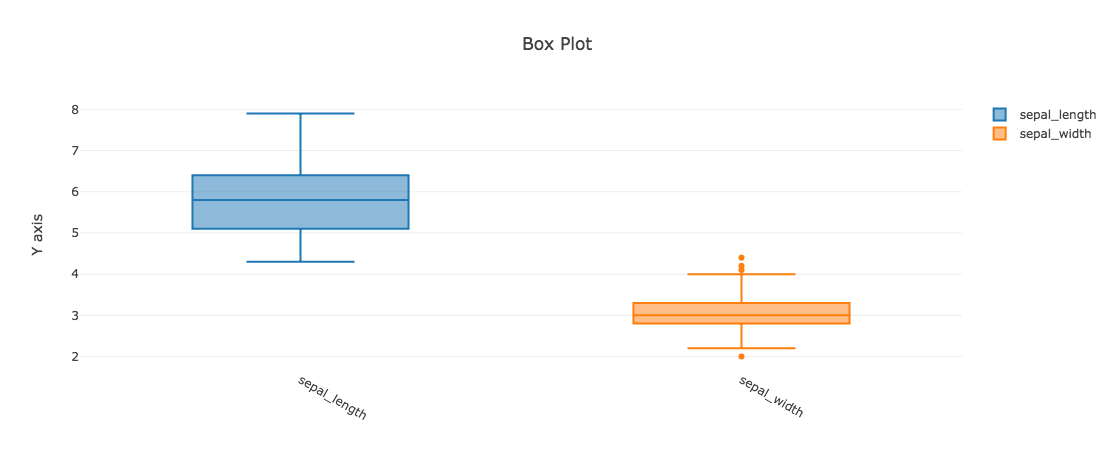

In [7]:
def go_box(df, col):
    gobox = go.Box(y = df[col],
                   name = col)
    return gobox

trace1 = go_box(iris, "sepal_length")
trace2 = go_box(iris, "sepal_width")
traces = [trace1, trace2]
layout = go.Layout(title = 'Box Plot', xaxis=dict(tickangle=30), yaxis = dict(title = 'Y axis'), bargap = 0, bargroupgap = 0)
fig = go.Figure(data=traces, layout=layout)
# path_html = plotly.offline.plot(fig, filename="output/box.html", auto_open=False, show_link=False)
plotly.offline.iplot(fig)

## Bar Plot - Count

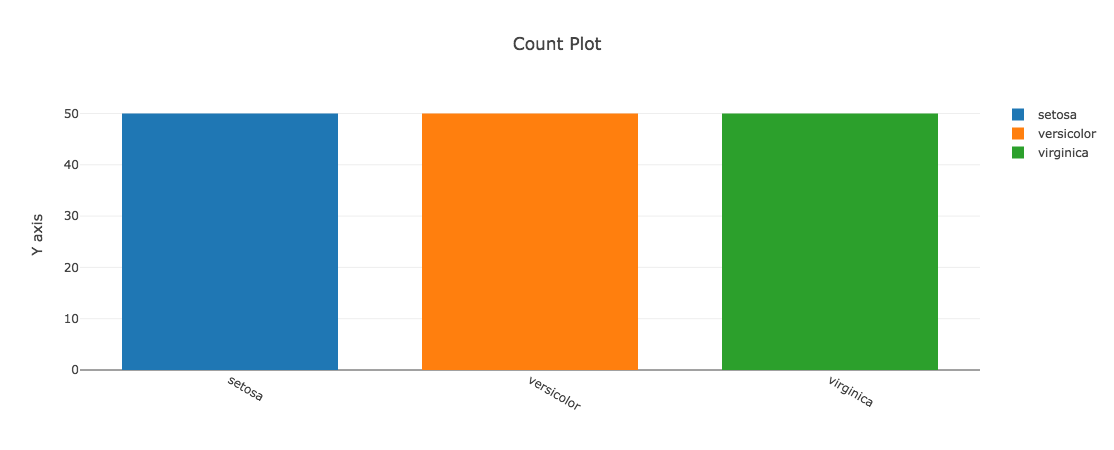

In [8]:
def go_barcount(df, col, value):
    gobarcount = go.Histogram(x = df[df[col]==value][col],
                              histfunc = "count",
                              name = value)
    return gobarcount

trace1 = go_barcount(iris, "species", np.unique(iris.species)[0])
trace2 = go_barcount(iris, "species", np.unique(iris.species)[1])
trace3 = go_barcount(iris, "species", np.unique(iris.species)[2])
traces = [trace1, trace2, trace3]
layout = go.Layout(title = 'Count Plot', xaxis=dict(tickangle=30), yaxis = dict(title = 'Y axis'), barmode='group', bargap = 0.2, bargroupgap = 0.1)
fig = go.Figure(data=traces, layout=layout)
# path_html = plotly.offline.plot(fig, filename="output/barcount.html", auto_open=False, show_link=False)
plotly.offline.iplot(fig)

## Bar Plot

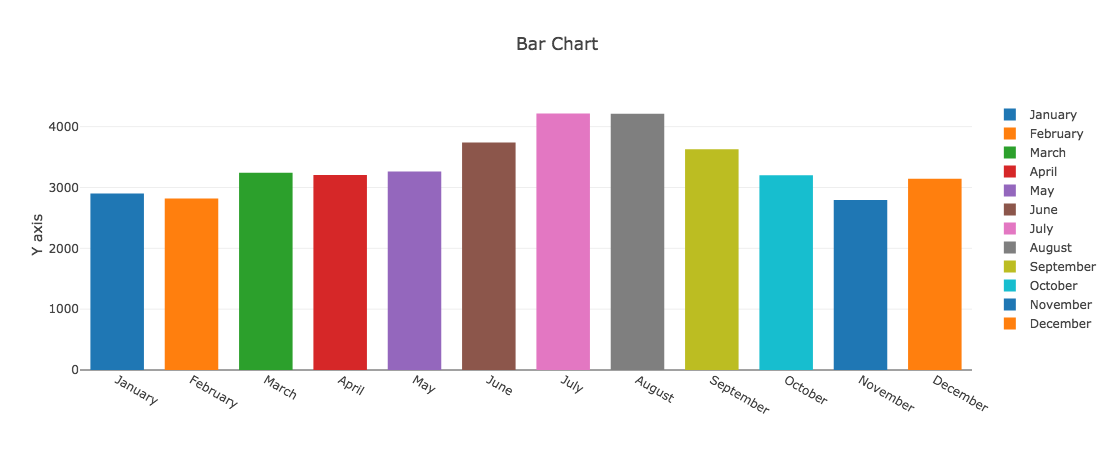

In [18]:
def go_bar(df, col_x, col_y):
    gobar = go.Bar(x = df[col_x],
                   y = df[col_y],
                   name = df[col_x].values[0])
    return gobar

traces = []
for i in range(len(flights_month)):
    trace = go_bar(flights_month.iloc[[i], :], "month", "passengers")
    traces += [trace]
layout = go.Layout(title = 'Bar Chart', xaxis=dict(tickangle=30), yaxis = dict(title = 'Y axis'), barmode='group', bargap = 0.2, bargroupgap = 0.1)
fig = go.Figure(data=traces, layout=layout)
# path_html = plotly.offline.plot(fig, filename="output/bar.html", auto_open=False, show_link=False)
plotly.offline.iplot(fig)

## Scatter Plot

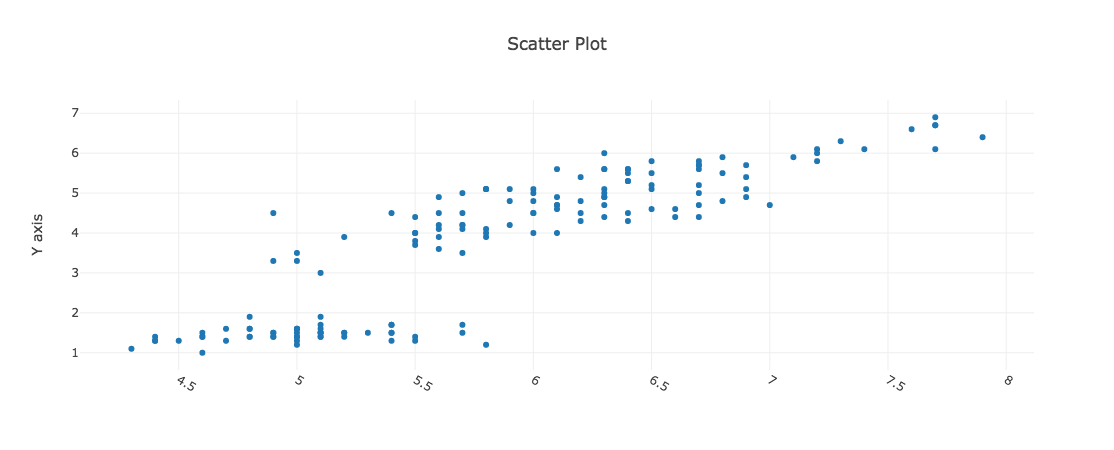

In [10]:
def go_scatter(df, col_x, col_y):
    goscatter = go.Scatter(x = df[col_x],
                        y = df[col_y],
                        mode = "markers",
                        name = col_x+"_"+col_y)
    return goscatter

trace = go_scatter(iris, "sepal_length", "petal_length")
traces = [trace]
layout = go.Layout(title = 'Scatter Plot', xaxis=dict(tickangle=30), yaxis = dict(title = 'Y axis'))
fig = go.Figure(data=traces, layout=layout)
# path_html = plotly.offline.plot(fig, filename="output/scatter.html", auto_open=False, show_link=False)
plotly.offline.iplot(fig)

## Line Plot

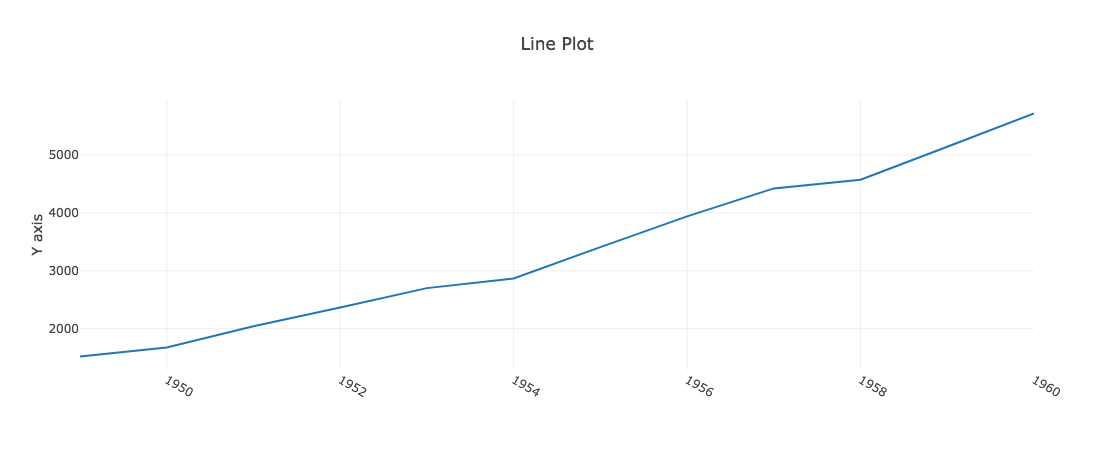

In [11]:
def go_line(df, col_x, col_y):
    goline = go.Scatter(x = df[col_x],
                        y = df[col_y],
                        mode = "lines",  # 'lines+markers'
                        name = col_x+"_"+col_y)
    return goline

trace = go_line(flights_year, "year", "passengers")
traces = [trace]
layout = go.Layout(title = 'Line Plot', xaxis=dict(tickangle=30), yaxis = dict(title = 'Y axis'))
fig = go.Figure(data=traces, layout=layout)
# path_html = plotly.offline.plot(fig, filename="output/line.html", auto_open=False, show_link=False)
plotly.offline.iplot(fig)

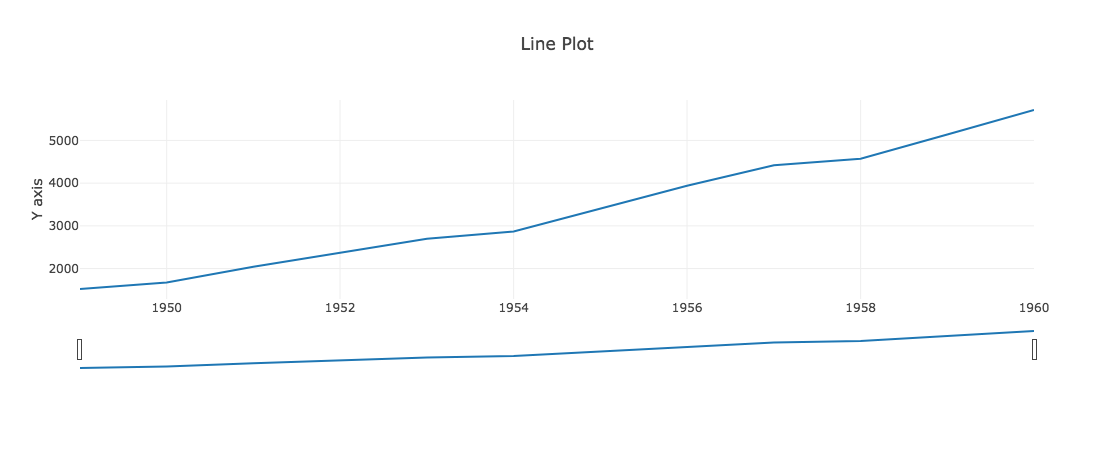

In [30]:
def go_line(df, col_x, col_y):
    goline = go.Scatter(x = df[col_x],
                        y = df[col_y],
                        mode = "lines",  # 'lines+markers'
                        name = col_x+"_"+col_y)
    return goline

trace = go_line(flights_year, "year", "passengers")
traces = [trace]
layout = go.Layout(title = 'Line Plot', xaxis=dict(rangeslider=dict(visible=True), type='date'), yaxis = dict(title = 'Y axis'))
fig = go.Figure(data=traces, layout=layout)
# path_html = plotly.offline.plot(fig, filename="output/line.html", auto_open=False, show_link=False)
plotly.offline.iplot(fig)